# Causal Representations

Directed acyclic graphs (DAGs) are essential tools for understanding causal relationships between variables. They are widely used in statistics, machine learning, and causal inference. 

The **key elements** of a DAG are:

1. **Node**: represents a variable or an event in the graph.
2. **Edge**: a directed arrow indicating a causal influence from one node (variable) to another.
3. **Parent node**: a node that has outgoing edges to one or more child nodes.
4. **Child node**: a node that has incoming edges from one or more parent nodes.


The **key properties** of a DAG are:
1. **Directed**: each edge in the graph has a direction, from one vertex to another.
2. **Acyclic**: there are no cycles; you cannot start at one vertex, follow a sequence of directed edges, and return to the starting vertex.
3. **Topological ordering**: the nodes of a DAG can be ordered in such a way that for every directed edge u → v, node u comes before node v in the ordering.

A DAG is a graph that is directed and has no cycles, meaning there is no way to start at one node and follow a consistent direction that leads back to the starting node.

> In a DAG, every parent is a direct cause of all its children.

To better understand DAGs, let's consider a simple example with the following variables:
1. **Temperature**
2. **Electricity load**
3. **Renewable energy production**
4. **Electricity price**

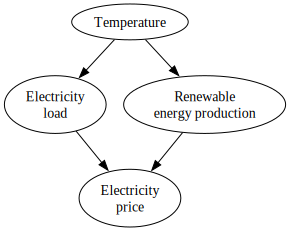

In [1]:
import graphviz
from IPython.display import display

# Create a new graph
dot = graphviz.Digraph()

# Add nodes
dot.node('T', 'Temperature')
dot.node('L', 'Electricity\nload')
dot.node('R', 'Renewable\nenergy production')
dot.node('P', 'Electricity\nprice')

# Add edges
dot.edge('T', 'L')
dot.edge('T', 'R')
dot.edge('R', 'P')
dot.edge('L', 'P')

# Display the graph in the notebook
display(dot)

**Understanding the DAG**

A DAG is used to visually represent the causal relationships between the key variables in the analysis. The key variables are represented as nodes, and the arrows represent the direction of influence. By examining the graph, we can understand how changes in one variable may impact others, forming a network of dependencies that govern market dynamics. In the example above, we have:

1. **Temperature → electricity load**: as temperature increases or decreases, it directly affects the electricity load. With warmer temperatures, the demand for electricity increases due to air conditioning usage. Similarly, colder temperatures can increase electricity demand for heating purposes.

2. **Temperature → renewable energy production**: temperature can affect the efficiency and output of renewable energy sources. For example, solar panels may produce more energy on sunny, warm days but less on extremely hot days when efficiency drops. Wind patterns, affected by temperature changes, can also impact wind energy production.

3. **Renewable energy production → electricity price**: the amount of renewable energy produced affects electricity prices. When renewable energy production is high, it can lead to lower electricity prices due to the abundance of cheaper energy sources. Conversely, low renewable energy production can increase reliance on more expensive, non-renewable energy sources, driving up prices.

4. **Electricity load → electricity price**: the demand for electricity (load) influences electricity prices. High electricity demand usually leads to higher prices because the supply must meet the increased load, often requiring more expensive or less efficient energy sources. Lower demand can result in lower prices due to decreased strain on the electricity grid and reliance on cheaper energy sources.


**Additional Concepts in DAGs**


**d-separation**

In addition to understanding direct causal relationships, it is also important to understand how to determine if variables are conditionally independent given other variables. This concept is known as **d-separation**, and it represents a criterion for deciding whether a set of nodes is independent of another set of nodes given a third set. It is a crucial concept in understanding the flow of information and causation in DAGs.

For example, in the context of our electricity market DAG:
- **Temperature** is d-separated from **electricity price** given **electricity load**. This means that if we know the electricity load, knowing the temperature provides no additional information about the electricity price.
- **Renewable energy production** and **electricity load** are not d-separated, indicating a direct causal relationship without any conditional independence given other variables.

By understanding d-separation, we can better interpret the dependencies and independencies in our DAG, leading to more accurate causal inferences.


**Local Markov assumption**

The Local Markov ssumption states that a node in a DAG is conditionally independent of its non-descendants given its parents. This assumption allows for the decomposition of the joint probability distribution of all variables in the DAG into simpler conditional distributions. For example, in our DAG, **electricity price** is conditionally independent of **temperature** given **renewable energy production** and **electricity load**. This implies that once we know the values of **renewable energy production** and **electricity load**, additional information about **temperature** does not change our understanding of **electricity price**.


**Factorization**

Factorization refers to the decomposition of a joint probability distribution into a product of conditional distributions. This is possible under the Local Markov Assumption. The joint distribution $ P(T, L, R, P) $ can be factorized as:

\begin{equation}
    P(T, L, R, P) = P(T) \cdot P(L|T) \cdot P(R|T) \cdot P(P|R, L)
\end{equation}

This factorization simplifies the computation of the joint probability distribution by breaking it down into manageable parts. It allows us to understand the contribution of each variable to the overall distribution, aiding in both analysis and inference.

**Minimality assumption**

The Minimality Assumption asserts that the DAG representing the causal structure is minimal, meaning that removing any edge would violate the Markov condition for the observed data. It ensures that the model encodes only necessary dependency relationships. It means that the DAG includes only those edges that represent necessary causal relationships. Removing any edge would lead to a loss of information about the dependencies among variables, ensuring that the DAG is the simplest model that adequately represents the data.

**Markov equivalence class**

A Markov equivalence class contains all DAGS that encode the same conditional independencies. This means that within a Markov equivalence class, multiple DAGs can represent the same set of conditional independence relationships among variables. These DAGs are considered equivalent because they imply the same probabilistic dependencies, even if their structures differ.

Consider the following three DAGs involving three variables $X$, $Y$, and $Z$:

**Graph 1:**

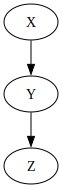

In [2]:
dot = graphviz.Digraph()
dot.node('X')
dot.node('Y')
dot.node('Z')
dot.edge('X', 'Y')
dot.edge('Y', 'Z')
display(dot)

**Graph 2:**

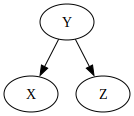

In [3]:
dot = graphviz.Digraph()
dot.node('X')
dot.node('Y')
dot.node('Z')
dot.edge('Y', 'X')
dot.edge('Y', 'Z')
display(dot)

**Graph 3:**

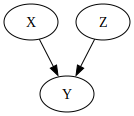

In [4]:
dot = graphviz.Digraph()
dot.node('X')
dot.node('Y')
dot.node('Z')
dot.edge('X', 'Y')
dot.edge('Z', 'Y')
display(dot)

Each of these DAGs represents the same conditional independence relationships: $X \perp Z | Y$, indicating that once we know $Y$, $X$ and $Z$ are independent.

A completed partially directed acyclic graph (CPDAG), also known as an Essential Graph (EG), is a graphical representation that captures all DAGs within a Markov equivalence class. The CPDAG contains both directed and undirected edges:

- **Directed edges** represent causal relationships that are common to all DAGs in the equivalence class.
- **Undirected edges** represent relationships where the directionality is ambiguous among the DAGs in the equivalence class.

The CPDAG can be constructed by:

1. Identifying all DAGs that belong to the same Markov equivalence class.
2. Retaining directed edges that are common to all these DAGs.
3. Converting edges with uncertain directionality into undirected edges.

Let's consider a CPDAG for the equivalence class of the three DAGs shown above:

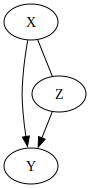

In [5]:
dot = graphviz.Digraph()
dot.node('X')
dot.node('Y')
dot.node('Z')
dot.edge('X', 'Y')
dot.edge('Z', 'Y')
dot.edge('X', 'Z', dir='none')  # undirected edge
display(dot)

In this CPDAG:
- The edges $X \to Y$ and $Z \to Y$ are directed because all DAGs in the equivalence class have these directions.
- The edge $X - Z$ is undirected, indicating that the direction between $X$ and $Z$ is ambiguous within the equivalence class.

The CPDAG or EG provides a compact and comprehensive representation of the causal structure, capturing all possible DAGs that explain the observed data:

- **Identification of causal relationships**: directed edges in the CPDAG indicate robust causal relationships that hold across all DAGs in the equivalence class.
- **Ambiguity in directionality**: undirected edges highlight areas where additional data or assumptions are needed to resolve the direction of causality.
- **Simplified analysis**: analysing a CPDAG instead of multiple individual DAGs simplifies the process of understanding the underlying causal structure.